##Ví dụ 1

In [9]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.9 MB/s eta 0:00:00


In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2025-04-27 13:17:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.207, 108.177.121.207, 209.85.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   207MB/s    in 0.3s    

2025-04-27 13:17:31 (207 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile
# Unzip the archive
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
base_dir ='/content/cats_and_dogs_filtered'
# Change the base_dir to where you put dataset
print("Contents of base directory:")
print(os.listdir(base_dir))
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'vectorize.py', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.180.jpg', 'cat.992.jpg', 'cat.683.jpg', 'cat.94.jpg', 'cat.312.jpg', 'cat.564.jpg', 'cat.179.jpg', 'cat.868.jpg', 'cat.648.jpg', 'cat.386.jpg']
['dog.447.jpg', 'dog.499.jpg', 'dog.444.jpg', 'dog.456.jpg', 'dog.532.jpg', 'dog.537.jpg', 'dog.480.jpg', 'dog.960.jpg', 'dog.910.jpg', 'dog.583.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 150x150 with 3 bytes color
  tf.keras.layers.InputLayer(shape=[150, 150, 3]), # Specify the input shape
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  # Only 1 output neuron.
  # It will contain a value from 0-1 where 0 for 1 class ('cats')
  # and 1 for the other ('dogs')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
batch_size=20,

class_mode = 'binary',
target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=15,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 74s - 737ms/step - accuracy: 0.5455 - loss: 0.7526 - val_accuracy: 0.6810 - val_loss: 0.6687
Epoch 2/15
100/100 - 70s - 696ms/step - accuracy: 0.6185 - loss: 0.6532 - val_accuracy: 0.7010 - val_loss: 0.5780
Epoch 3/15
100/100 - 68s - 679ms/step - accuracy: 0.7045 - loss: 0.5768 - val_accuracy: 0.7080 - val_loss: 0.5629
Epoch 4/15
100/100 - 70s - 696ms/step - accuracy: 0.7410 - loss: 0.5146 - val_accuracy: 0.7330 - val_loss: 0.5454
Epoch 5/15
100/100 - 68s - 684ms/step - accuracy: 0.7875 - loss: 0.4588 - val_accuracy: 0.7330 - val_loss: 0.5344
Epoch 6/15
100/100 - 67s - 673ms/step - accuracy: 0.8290 - loss: 0.3873 - val_accuracy: 0.7080 - val_loss: 0.5744
Epoch 7/15
100/100 - 67s - 671ms/step - accuracy: 0.8700 - loss: 0.3005 - val_accuracy: 0.7210 - val_loss: 0.6481
Epoch 8/15
100/100 - 68s - 679ms/step - accuracy: 0.9080 - loss: 0.2322 - val_accuracy: 0.7270 - val_loss: 0.6800
Epoch 9/15
100/100 - 67s - 668ms/step - accuracy: 0.9445 - loss: 0.1492 - val_accuracy: 0.7220 - va

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
model(tf.keras.Input((150, 150, 3)))
visualization_model = tf.keras.models.Model([model.inputs], outputs =successive_outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 150, 150, 3))
  warnings.warn(msg)


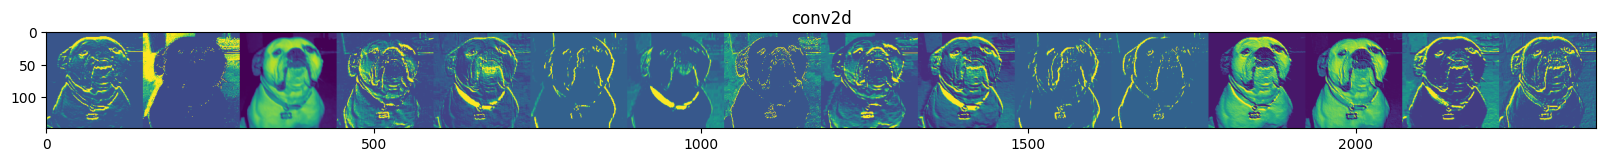

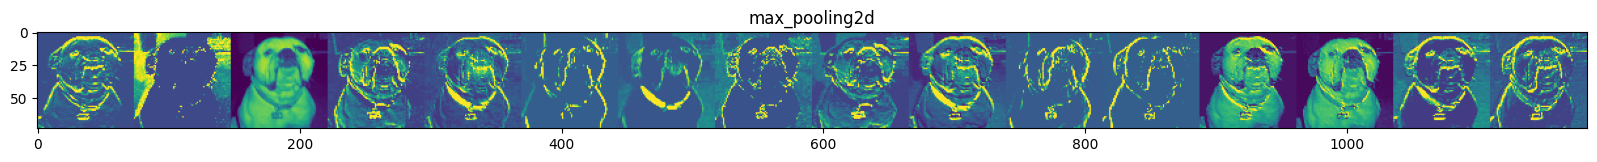

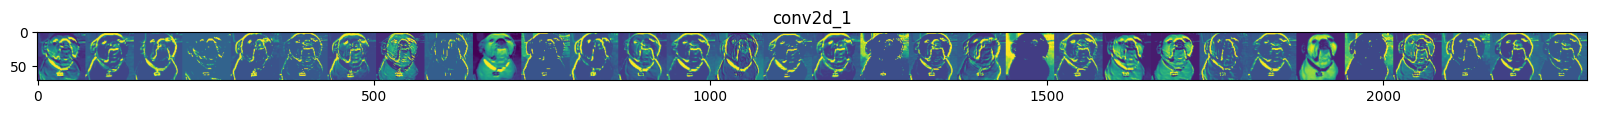

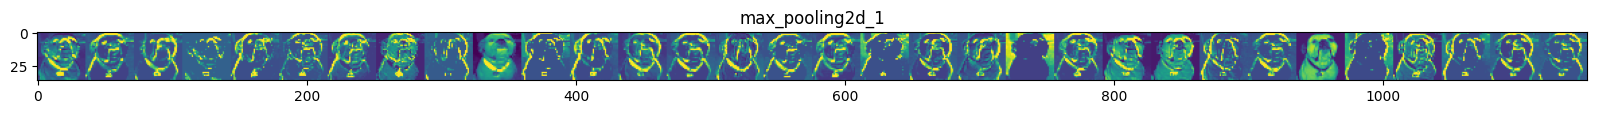

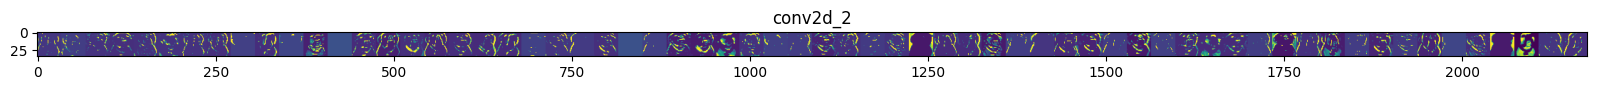

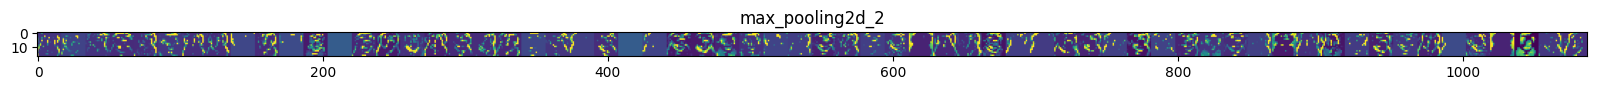

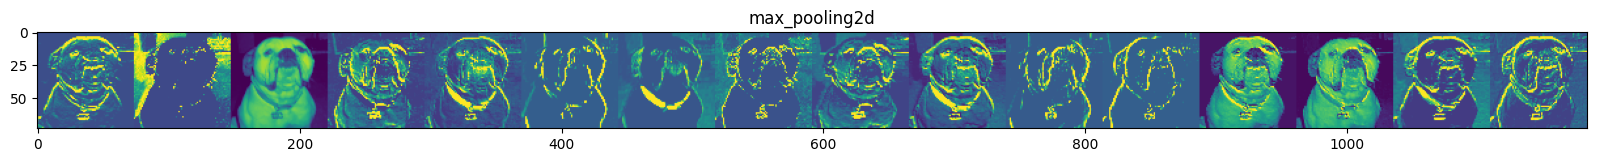

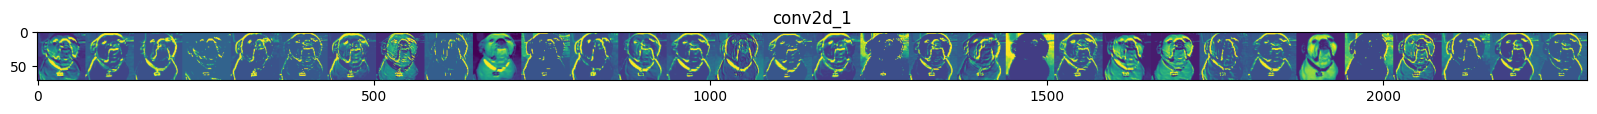

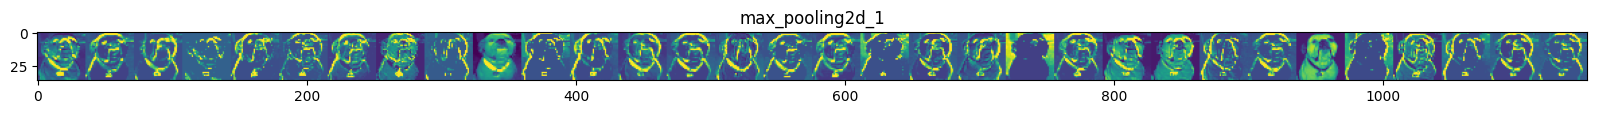

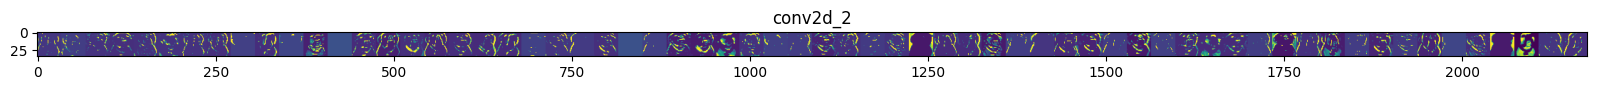

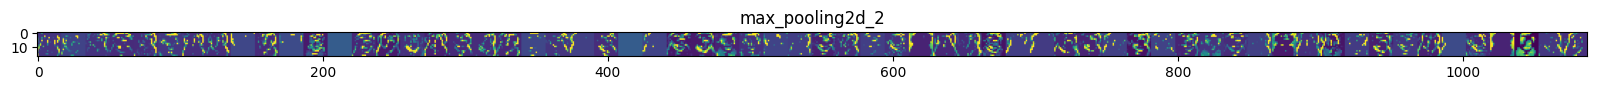

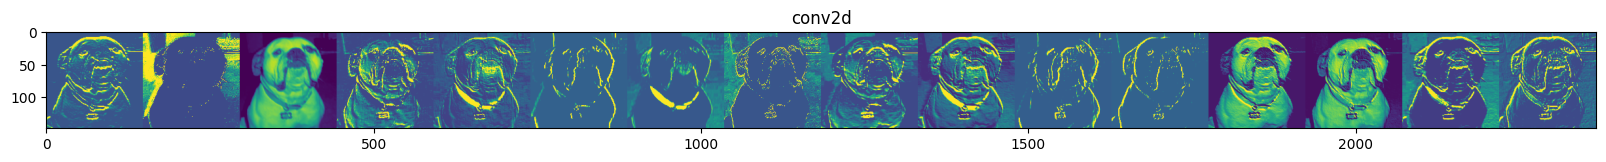

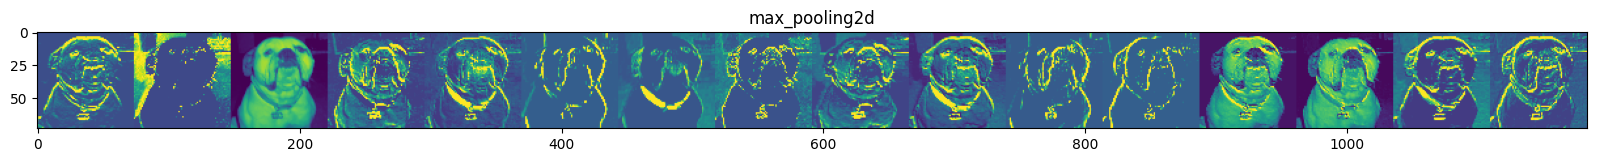

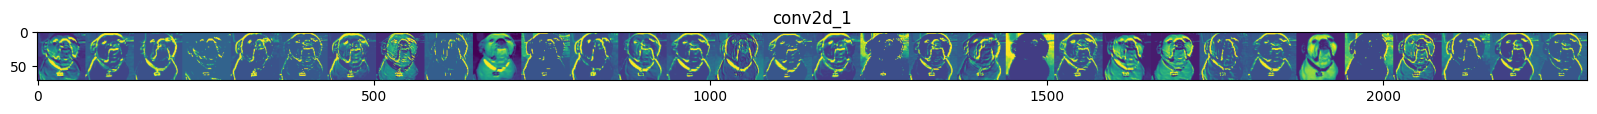

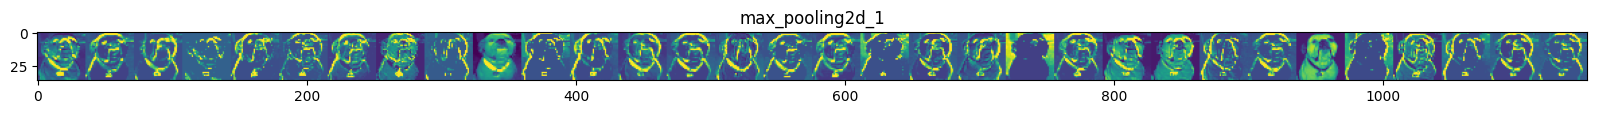

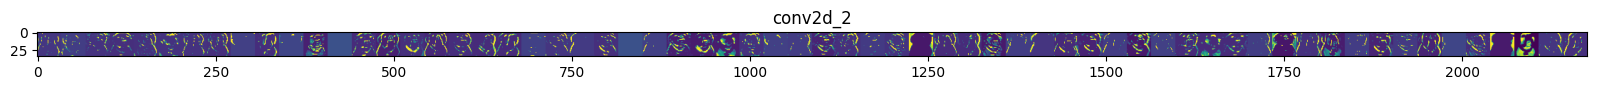

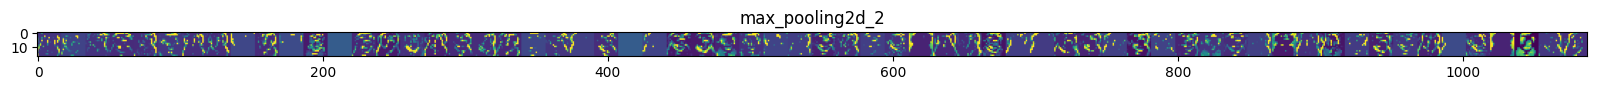

In [21]:
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150,3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150,150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the
# layers, so we can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            if (x.std() != 0):
                x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            if (x.std() != 0):
                x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            if (x.std () != 0):
                x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        # Tile each filter into a horizontal grid
        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [29]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image
#uploaded=files.upload()
#for fn in uploaded.keys():
fn = '/content/4.jpg' # change it to your image file

In [30]:
# predicting images
path='/content/4.jpg' # change it to your image
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  print(fn + " is a dog" )
else:
  print(fn + " is a cat" )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[1.]
/content/4.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

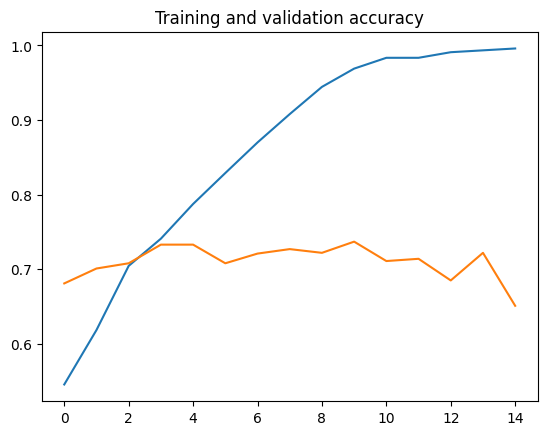

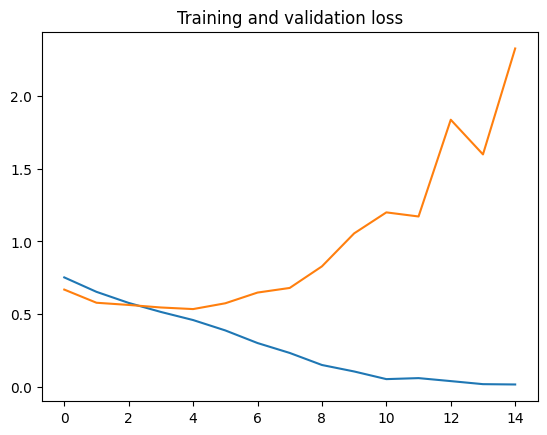

In [31]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

##Bài tập thực hành 1

Phân tích Loss Function trên tập Training và Validation
Quan sát
Training Loss (đường màu xanh dương):

Training Loss giảm đều đặn từ giá trị ban đầu khoảng 0.5 xuống gần 0 qua 14 epoch.
Xu hướng giảm này cho thấy mô hình học tốt trên tập huấn luyện, lỗi (loss) trên tập huấn luyện ngày càng nhỏ.

Validation Loss (đường màu cam):

Validation Loss ban đầu cũng giảm nhẹ, từ khoảng 0.5 xuống mức thấp nhất khoảng 0.3 sau vài epoch đầu.
Tuy nhiên, sau đó Validation Loss bắt đầu tăng mạnh, đặc biệt từ epoch 8 trở đi, và đạt mức hơn 2.0 vào cuối giai đoạn huấn luyện (epoch 14).
Xu hướng này cho thấy mô hình không còn cải thiện trên tập kiểm tra, mà ngược lại, lỗi tăng lên đáng kể.

Giải thích kết quả
Training Loss giảm đều:

Điều này cho thấy mô hình đang học tốt trên tập huấn luyện. Mô hình có khả năng tối ưu hóa tốt trên dữ liệu huấn luyện, giảm thiểu sai số qua từng epoch.
Tuy nhiên, nếu Training Loss giảm quá thấp (gần 0), có thể mô hình đang "học thuộc" dữ liệu huấn luyện, dẫn đến nguy cơ overfitting.

Validation Loss tăng mạnh:

Ban đầu, Validation Loss giảm nhẹ cho thấy mô hình có khả năng tổng quát hóa tốt trên tập kiểm tra trong vài epoch đầu.
Tuy nhiên, khi Validation Loss tăng mạnh sau đó, đây là dấu hiệu rõ ràng của overfitting. Mô hình đã học quá tốt trên tập huấn luyện nhưng không thể tổng quát hóa tốt trên dữ liệu mới (tập validation). Điều này có nghĩa là mô hình đang "học thuộc" các đặc điểm cụ thể của tập huấn luyện, thay vì học các đặc trưng tổng quát có thể áp dụng cho dữ liệu chưa thấy.
Khoảng cách lớn giữa Training Loss (rất thấp) và Validation Loss (rất cao) vào cuối quá trình huấn luyện là một dấu hiệu điển hình của overfitting.



In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Đường dẫn thư mục
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Resize ảnh về kích thước 150x150
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Tạo ImageDataGenerator để load và chuẩn hóa ảnh
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Xây dựng mô hình CNN với Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Thêm Dropout với rate_drop = 0.3

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.4),  # Thêm Dropout với rate_drop = 0.4

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),  # Thêm Dropout với rate_drop = 0.5

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Thêm Dropout trước tầng Dense
    Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
EPOCHS = 14
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Vẽ biểu đồ Training và Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.5039 - loss: 1.1079 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5016 - loss: 0.6934 - val_accuracy: 0.5580 - val_loss: 0.6923
Epoch 3/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5351 - loss: 0.6869 - val_accuracy: 0.5840 - val_loss: 0.6756
Epoch 4/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.5618 - loss: 0.6611 - val_accuracy: 0.6000 - val_loss: 0.6377
Epoch 5/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.5891 - loss: 0.6496 - val_accuracy: 0.6100 - val_loss: 0.6498
Epoch 6/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6010 - loss: 0.6514 - val_accuracy: 0.5980 - val_loss: 0.6513
Epoch 7/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6402 - loss: 0.6190 - val_accuracy: 0.6760 - val_loss: 0.6050
Epoch 8/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.6823 - loss: 0.5885 - val_accuracy: 0.6890 - v

In [33]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Hàm chuyển ảnh thành vector
def load_and_flatten_images(directory, label, img_size=(150, 150)):
    images = []
    labels = []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Chuẩn hóa
            img_flattened = img_array.flatten()  # Chuyển thành vector
            images.append(img_flattened)
            labels.append(label)
        except:
            continue
    return np.array(images), np.array(labels)

# Load dữ liệu huấn luyện và kiểm tra
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Load và flatten ảnh
X_train_cats, y_train_cats = load_and_flatten_images(train_cats_dir, label=0)
X_train_dogs, y_train_dogs = load_and_flatten_images(train_dogs_dir, label=1)
X_val_cats, y_val_cats = load_and_flatten_images(validation_cats_dir, label=0)
X_val_dogs, y_val_dogs = load_and_flatten_images(validation_dogs_dir, label=1)

# Gộp dữ liệu huấn luyện và kiểm tra
X_train = np.vstack((X_train_cats, X_train_dogs))
y_train = np.hstack((y_train_cats, y_train_dogs))
X_val = np.vstack((X_val_cats, X_val_dogs))
y_val = np.hstack((y_val_cats, y_val_dogs))

# Huấn luyện mô hình Hồi quy Logistic
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = logistic_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression Results:
Accuracy: 0.5510
Precision: 0.5600
Recall: 0.4760
F1 Score: 0.5146


In [34]:
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Áp dụng PCA để giảm chiều
pca = PCA(n_components=225)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Xây dựng mô hình ANN
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(225,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Huấn luyện mô hình
ann_history = ann_model.fit(
    X_train_pca, y_train,
    epochs=14,
    batch_size=32,
    validation_data=(X_val_pca, y_val)
)

# Đánh giá độ chính xác của ANN
val_loss, val_accuracy = ann_model.evaluate(X_val_pca, y_val)
print(f"ANN Accuracy after PCA: {val_accuracy:.4f}")

Epoch 1/14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5043 - loss: 1.9311 - val_accuracy: 0.5930 - val_loss: 0.7997
Epoch 2/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5670 - loss: 1.0780 - val_accuracy: 0.5780 - val_loss: 0.6903
Epoch 3/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6277 - loss: 0.7118 - val_accuracy: 0.5710 - val_loss: 0.6769
Epoch 4/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6524 - loss: 0.6517 - val_accuracy: 0.5930 - val_loss: 0.6689
Epoch 5/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7014 - loss: 0.5694 - val_accuracy: 0.6130 - val_loss: 0.6566
Epoch 6/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7006 - loss: 0.6030 - val_accuracy: 0.6210 - val_loss: 0.6512
Epoch 7/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7150 - loss: 0.5589 - val_accuracy: 0.6120 - val_loss: 0.6630
Epoch 8/14
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7581 - loss: 0.5089 - val_accuracy: 0.5940 - val_loss: 0.6673
Epo

##Ví dụ 2

In [44]:
import zipfile

# Ensure the correct path to the ZIP file
local_zip = "/content/archive (5).zip"  # Update with the actual path

# Add error handling (try-except block)
try:
    # Attempt to open the ZIP file
    with zipfile.ZipFile(local_zip, "r") as zip_ref:
        zip_ref.extractall()
except zipfile.BadZipFile:
    # Handle BadZipFile exception
    print(f"Error: The file at '{local_zip}' is not a valid ZIP file.")
    # Implement logic to address the issue, e.g., download the file again
except FileNotFoundError:
    # Handle FileNotFoundError if the file doesn't exist
    print(f"Error: The file at '{local_zip}' was not found.")
    # Implement logic to resolve the file path issue

In [35]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds

In [36]:
import tensorflow as tf

def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        # First convolution layer
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.15),  # Adding dropout to reduce overfitting

        # Second convolution layer
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.1),

        # Third convolution layer
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.10),

        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),

        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),

        # Output layer for binary classification (cats vs dogs)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [47]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_test_animals():
    # Creates an instance of ImageDataGenerator for training and validation
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    # Training data generator
    train_generator = train_datagen.flow_from_directory(
        '/content/animals',  # Source directory
        target_size=(150, 150),  # Resize images
        batch_size=15,
        class_mode='categorical',
        subset='training'
    )

    # Validation data generator
    validation_generator = train_datagen.flow_from_directory(
        '/content/animals',  # Same source directory
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation'  # Set as validation data
    )

    # Number of epochs
    epochs = 2

    # Create the model using the gen_model function
    model = gen_model()

    # Model training
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    # Extract accuracy and loss from history
    acc = history.history['accuracy']  # Update 'acc' to 'accuracy' to match the metric defined in gen_model
    val_acc = history.history['val_accuracy']  # Update 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation accuracy/loss
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

    # Print training and testing accuracy
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Testing Accuracy:", history.history['val_accuracy'][-1])

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_test_animals():
    # Creates an instance of ImageDataGenerator for training and validation
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    # Training data generator
    train_generator = train_datagen.flow_from_directory(
        '/content/animals',  # Source directory
        target_size=(150, 150),  # Resize images
        batch_size=15,
        class_mode='binary',  # Changed to 'binary' for binary classification
        subset='training'
    )

    # Validation data generator
    validation_generator = train_datagen.flow_from_directory(
        '/content/animals',  # Same source directory
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary',  # Changed to 'binary' for binary classification
        subset='validation'  # Set as validation data
    )

    # Number of epochs
    epochs = 2

    # Create the model using the gen_model function
    model = gen_model()

    # Model training
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    # Extract accuracy and loss from history
    acc = history.history['accuracy']  # Update 'acc' to 'accuracy' to match the metric defined in gen_model
    val_acc = history.history['val_accuracy']  # Update 'val_acc' to 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training and validation accuracy/loss
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

    # Print training and testing accuracy
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Testing Accuracy:", history.history['val_accuracy'][-1])

Found 4503 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 97s 633ms/step - accuracy: 0.1943 - loss: -61380.2148 - val_accuracy: 0.1653 - val_loss: -2070802.2500
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 92s 614ms/step - accuracy: 0.1613 - loss: -22359552.0000 - val_accuracy: 0.1467 - val_loss: -132886888.0000


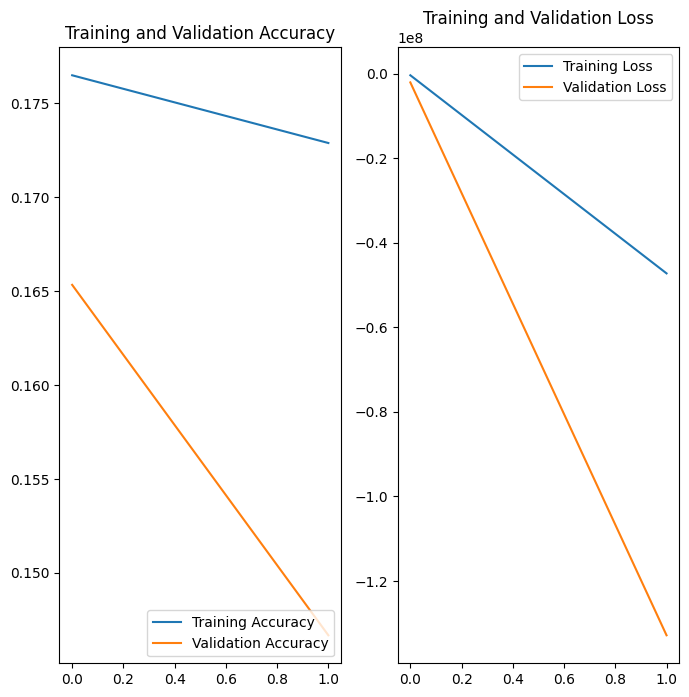

Training Accuracy: 0.1728888899087906
Testing Accuracy: 0.14666666090488434


In [50]:
train_test_animals()

In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Hàm chuyển ảnh thành vector
def load_and_flatten_images(directory, label, img_size=(150, 150)):
    images = []
    labels = []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Chuẩn hóa
            img_flattened = img_array.flatten()  # Chuyển thành vector
            images.append(img_flattened)
            labels.append(label)
        except:
            continue
    return np.array(images), np.array(labels)

# Đường dẫn đến dữ liệu
base_dir = '/content/animals/animals'
cats_dir = os.path.join(base_dir, 'cats')
dogs_dir = os.path.join(base_dir, 'dogs')
panda_dir = os.path.join(base_dir, 'panda')

# Load và flatten ảnh
X_cats, y_cats = load_and_flatten_images(cats_dir, label=0)
X_dogs, y_dogs = load_and_flatten_images(dogs_dir, label=1)
X_panda, y_panda = load_and_flatten_images(panda_dir, label=2)

# Gộp dữ liệu
X = np.vstack((X_cats, X_dogs, X_panda))
y = np.hstack((y_cats, y_dogs, y_panda))

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Huấn luyện mô hình Hồi quy Softmax
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred_softmax = softmax_model.predict(X_val)
softmax_accuracy = accuracy_score(y_val, y_pred_softmax)
softmax_precision = precision_score(y_val, y_pred_softmax, average='weighted')
softmax_recall = recall_score(y_val, y_pred_softmax, average='weighted')
softmax_f1 = f1_score(y_val, y_pred_softmax, average='weighted')

print("Softmax Regression Results:")
print(f"Accuracy: {softmax_accuracy:.4f}")
print(f"Precision: {softmax_precision:.4f}")
print(f"Recall: {softmax_recall:.4f}")
print(f"F1 Score: {softmax_f1:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Regression Results:
Accuracy: 0.5013
Precision: 0.5192
Recall: 0.5013
F1 Score: 0.5053


In [52]:
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Áp dụng PCA để giảm chiều
pca = PCA(n_components=225)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Chuyển nhãn thành one-hot encoding cho ANN
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val_onehot = tf.keras.utils.to_categorical(y_val, num_classes=3)

# Xây dựng mô hình ANN
ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(225,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Biên dịch mô hình
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Huấn luyện mô hình
ann_history = ann_model.fit(
    X_train_pca, y_train_onehot,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_pca, y_val_onehot),
    verbose=1
)

# Đánh giá độ chính xác của ANN
val_loss, ann_accuracy = ann_model.evaluate(X_val_pca, y_val_onehot, verbose=0)
print(f"ANN Accuracy after PCA: {ann_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4504 - loss: 3.2237 - val_accuracy: 0.5107 - val_loss: 0.9645
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5426 - loss: 1.3089 - val_accuracy: 0.5387 - val_loss: 0.8978
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5956 - loss: 0.9100 - val_accuracy: 0.5653 - val_loss: 0.8585
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6366 - loss: 0.7621 - val_accuracy: 0.5707 - val_loss: 0.8493
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6490 - loss: 0.7524 - val_accuracy: 0.5693 - val_loss: 0.8540
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6448 - loss: 0.7417 - val_accuracy: 0.5813 - val_loss: 0.8278
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6905 - loss: 0.6826 - val_accuracy: 0.5867 - val_loss: 0.8205
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.6313 - val_accuracy: 0.5840 - val_loss:

##Bài tập tự làm

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Định nghĩa lại hàm gen_model (đã có từ trước, giữ nguyên cho 3 lớp)
def gen_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.15),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Định nghĩa lại hàm train_test_animals
def train_test_animals():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
    train_generator = train_datagen.flow_from_directory(
        '/content/animals/animals',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='training'
    )
    validation_generator = train_datagen.flow_from_directory(
        '/content/animals/animals',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation'
    )
    epochs = 2
    model = gen_model()
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )
    cnn_accuracy = history.history['val_accuracy'][-1]
    print("CNN Accuracy:", cnn_accuracy)
    return history

# Chạy để lấy độ chính xác CNN
cnn_history = train_test_animals()

# So sánh độ chính xác
print("\nComparison of Model Accuracies:")
print(f"Softmax Regression Accuracy: {softmax_accuracy:.4f}")
print(f"ANN (with PCA) Accuracy: {ann_accuracy:.4f}")
print(f"CNN Accuracy: {cnn_history.history['val_accuracy'][-1]:.4f}")

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 100s 654ms/step - accuracy: 0.4681 - loss: 1.2378 - val_accuracy: 0.6440 - val_loss: 0.7820
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 99s 659ms/step - accuracy: 0.6055 - loss: 0.7504 - val_accuracy: 0.6493 - val_loss: 0.7338
CNN Accuracy: 0.6493333578109741

Comparison of Model Accuracies:
Softmax Regression Accuracy: 0.5013
ANN (with PCA) Accuracy: 0.5813
CNN Accuracy: 0.6493


In [55]:
# Load dữ liệu với ImageDataGenerator
train_datagen_binary = ImageDataGenerator(rescale=1./255)
train_generator_binary = train_datagen_binary.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',  # Changed to 'categorical'
    subset='training',
    classes=['cats', 'dogs'],
    shuffle=True
)

validation_generator_binary = train_datagen_binary.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',  # Changed to 'categorical'
    subset='validation',
    classes=['cats', 'dogs'],
    shuffle=True
)

Found 2000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [62]:
import random
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

# Định nghĩa gen_model (đã có từ trước)
def gen_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.15),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Định nghĩa lại train_generator và validation_generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
train_generator = train_datagen.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',  # Sử dụng categorical để nhãn ở dạng one-hot encoding
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',  # Sử dụng categorical để nhãn ở dạng one-hot encoding
    subset='validation'
)

# Chọn ngẫu nhiên 5 ảnh từ tập dữ liệu
def load_sample_images(base_dir, num_samples=5):
    sample_images = []
    sample_labels = []
    for label, class_dir in enumerate(['cats', 'dogs', 'panda']):
        class_path = os.path.join(base_dir, class_dir)
        img_files = os.listdir(class_path)
        selected_files = random.sample(img_files, min(num_samples // 3 + 1, len(img_files)))
        for fname in selected_files:
            img_path = os.path.join(class_path, fname)
            img = load_img(img_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0
            sample_images.append(img_array)
            sample_labels.append(label)
    return np.array(sample_images), np.array(sample_labels)

# Load mẫu và dự đoán
sample_images, sample_labels = load_sample_images('/content/animals/animals', num_samples=5)
model = gen_model()
model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=1
)
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Đánh giá độ chính xác trên mẫu
sample_accuracy = accuracy_score(sample_labels, predicted_labels)
print(f"Accuracy on sample images: {sample_accuracy:.4f}")
for i, (true_label, pred_label) in enumerate(zip(sample_labels, predicted_labels)):
    print(f"Image {i+1}: True Label = {true_label}, Predicted Label = {pred_label}")

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 102s 663ms/step - accuracy: 0.4344 - loss: 1.2510 - val_accuracy: 0.6200 - val_loss: 0.7484
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 104s 695ms/step - accuracy: 0.6578 - loss: 0.6828 - val_accuracy: 0.6653 - val_loss: 0.6701
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Accuracy on sample images: 0.6667
Image 1: True Label = 0, Predicted Label = 2
Image 2: True Label = 0, Predicted Label = 0
Image 3: True Label = 1, Predicted Label = 1
Image 4: True Label = 1, Predicted Label = 0
Image 5: True Label = 2, Predicted Label = 2
Image 6: True Label = 2, Predicted Label = 2


In [63]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Hàm load_and_flatten_images (đã có từ trước)
def load_and_flatten_images(directory, label, img_size=(150, 150)):
    images = []
    labels = []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            img_flattened = img_array.flatten()
            images.append(img_flattened)
            labels.append(label)
        except:
            continue
    return np.array(images), np.array(labels)

# Đường dẫn đến dữ liệu
cats_dir = '/content/animals/animals/cats'
dogs_dir = '/content/animals/animals/dogs'

# Load dữ liệu chỉ cho chó và mèo
X_cats, y_cats = load_and_flatten_images(cats_dir, label=0)
X_dogs, y_dogs = load_and_flatten_images(dogs_dir, label=1)
X_binary = np.vstack((X_cats[:150], X_dogs[:150]))  # Lấy 150 ảnh mỗi lớp
y_binary = np.hstack((y_cats[:150], y_dogs[:150]))

# Chia dữ liệu: 300 ảnh huấn luyện, 100 ảnh kiểm tra
from sklearn.model_selection import train_test_split
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(
    X_binary, y_binary, train_size=0.75, test_size=0.25, random_state=42
)

# Huấn luyện mô hình CNN với 2 lớp
def gen_model_binary():
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),  # Sử dụng Input thay vì truyền input_shape vào Conv2D
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.15),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')  # 2 lớp với Softmax
    ])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Load dữ liệu với ImageDataGenerator, chỉ load 2 lớp cats và dogs
train_datagen_binary = ImageDataGenerator(rescale=1./255, validation_split=0.25)  # Thêm validation_split
train_generator_binary = train_datagen_binary.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='sparse',  # Sử dụng sparse cho nhãn dạng số nguyên
    subset='training',
    classes=['cats', 'dogs'],  # Chỉ lấy 2 lớp
    shuffle=True
)

validation_generator_binary = train_datagen_binary.flow_from_directory(
    '/content/animals/animals',
    target_size=(150, 150),
    batch_size=15,
    class_mode='sparse',
    subset='validation',  # Sử dụng subset validation
    classes=['cats', 'dogs'],
    shuffle=True
)

# Huấn luyện và dự đoán
model_binary = gen_model_binary()
history_binary = model_binary.fit(
    train_generator_binary,
    steps_per_epoch=20,  # 300 ảnh / batch_size 15
    epochs=2,
    validation_data=validation_generator_binary,
    validation_steps=6,  # 100 ảnh / batch_size 15
    verbose=1
)

# Dự đoán
val_images, val_labels = next(validation_generator_binary)
predictions_binary = model_binary.predict(val_images)
predicted_labels_binary = np.argmax(predictions_binary, axis=1)
print("Binary Classification Results:")
print(f"True Labels: {val_labels}")
print(f"Predicted Labels: {predicted_labels_binary}")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 715ms/step - accuracy: 0.4930 - loss: 2.3334 - val_accuracy: 0.5222 - val_loss: 0.6926
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 699ms/step - accuracy: 0.5509 - loss: 0.6961 - val_accuracy: 0.5333 - val_loss: 0.6922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Binary Classification Results:
True Labels: [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.]
Predicted Labels: [1 1 1 0 0 0 0 1 0 1 1 1 1 1 1]


In [64]:
def gen_model_binary_with_dropout():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.3),  # Tăng lên 0.3
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.4),  # Tăng lên 0.4
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(rate=0.5),  # Tăng lên 0.5
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# Huấn luyện lại với Dropout mới
model_binary_dropout = gen_model_binary_with_dropout()
history_binary_dropout = model_binary_dropout.fit(
    train_generator_binary,
    steps_per_epoch=20,
    epochs=2,
    validation_data=validation_generator_binary,
    validation_steps=6,
    verbose=1
)

# Vẽ biểu đồ Loss để quan sát
plt.figure(figsize=(8, 6))
plt.plot(history_binary_dropout.history['loss'], label='Training Loss', color='blue')
plt.plot(history_binary_dropout.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss with Higher Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 694ms/step - accuracy: 0.4893 - loss: 2.5106 - val_accuracy: 0.5556 - val_loss: 0.6927
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 669ms/step - accuracy: 0.5078 - loss: 0.6940 - val_accuracy: 0.5222 - val_loss: 0.6928
